<a href="https://www.kaggle.com/code/vijays140291/multi-input-layer-neural-network?scriptVersionId=121839073" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Tensorflow
TensorFlow is a powerful open-source software library developed by Google for numerical computation using data flow graphs. It was released in November 2015 and has quickly become one of the most popular tools for building and training machine learning models. TensorFlow provides a flexible architecture that can run on a variety of platforms, including CPUs, GPUs, and even mobile devices. It also offers a rich set of tools and libraries for model development, evaluation, and deployment. In this article, we'll explore the key features and benefits of TensorFlow.

Data flow graphs

One of the key features of TensorFlow is its use of data flow graphs to represent computation. A data flow graph is a directed graph where the nodes represent operations, and the edges represent the data that flows between them. Each node in the graph represents an operation, such as addition or multiplication, and the edges represent the input and output tensors.

Tensors are multi-dimensional arrays that can represent vectors, matrices, or higher-order data structures. They are the fundamental building blocks of machine learning models and are used to represent both input data and model parameters. TensorFlow supports various data types, including floating-point numbers, integers, and booleans.

Data flow graphs provide a natural way to represent machine learning models as a series of interconnected operations. They also allow TensorFlow to automatically parallelize computations across multiple CPUs or GPUs, which can lead to significant speedups.

High-level APIs

TensorFlow provides several high-level APIs that make it easy to build and train machine learning models. The most popular of these APIs is Keras, which provides a simple and intuitive interface for building neural networks. Keras is built on top of TensorFlow and provides a high-level API for defining models, layers, and loss functions.

Another popular high-level API is TensorFlow Estimators, which provides a simple interface for building and training models using pre-built algorithms. Estimators support a wide range of machine learning tasks, including regression, classification, and clustering.

Finally, TensorFlow Hub provides a centralized repository of pre-trained machine learning models that can be easily integrated into your own applications. These models cover a wide range of tasks, including image recognition, natural language processing, and more.

Scalability

TensorFlow is designed to scale from a single CPU to hundreds or thousands of GPUs. It can automatically distribute computations across multiple devices, making it easy to take advantage of the power of modern hardware. This scalability makes TensorFlow ideal for training large machine learning models on large datasets.

TensorFlow also supports distributed training, which allows models to be trained across multiple machines in a cluster. This can lead to significant speedups and allows models to be trained on even larger datasets.

Visualization and debugging tools

TensorFlow provides several visualization and debugging tools that make it easy to understand and debug machine learning models. TensorBoard is a web-based tool that allows you to visualize the computation graph, track training progress, and explore model performance. It can also be used to profile and optimize performance.

TensorFlow also provides several debugging tools, including tfdbg and TensorFlow Debugger (tfdbg), which allow you to inspect the computation graph and debug model behavior.

Deployment

TensorFlow makes it easy to deploy machine learning models to a variety of platforms, including mobile devices and the cloud. TensorFlow Lite is a lightweight version of TensorFlow that is optimized for mobile and embedded devices. It allows machine learning models to be run on-device, without requiring a connection to the cloud.

TensorFlow also supports deployment to the cloud, including Google Cloud Platform (GCP). TensorFlow models can be trained and deployed on GCP using tools like Cloud ML Engine, which makes it easy to build and deploy machine learning models at scale.

Conclusion

TensorFlow is a powerful and flexible tool for building and training machine learning models. Its use of data flow graphs provides a natural way to represent machine learning models as a series of






# Task

Detecting Fraud in Financial Transaction

In [1]:
#importing library
import numpy as np
import pandas as pd
#train_test_split
from sklearn.model_selection import train_test_split
#StandardScaler
from sklearn.preprocessing import StandardScaler
#metrics 
from sklearn.metrics import classification_report,confusion_matrix
#neural_network
import tensorflow as tf



#visualisation library
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
#showing the dataset
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [4]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

# #Getting the Information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Checking the Missing Value in Each Dataset

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [30]:
def preprocess_inputs(df):
    df=df.copy()
    #dropping the step and ifFlaggedFraud column
    df=df.drop(['step','isFlaggedFraud'],axis=1)
    #dropping the nameOrig
    df=df.drop('nameOrig',axis=1)
    #spitting between x and y
    
    #applying onehot_encode on type feature
    
    df=onehot_encode(df,'type')
    
    y=df['isFraud']
    x=df.drop('isFraud',axis=1)
    #train_test_split
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=1)
    
    #using tokenizer to convert the customer id to the number based on how frequent that customer appear in the dataset
    tokenizer=tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(x_train['nameDest'])
    print(len(tokenizer.word_index))
    customer_xtrain=tokenizer.texts_to_sequences(x_train['nameDest'])
    customer_xtest=tokenizer.sequences_to_texts(x_test['nameDest'])

    #pad_sequences
    
    customer_xtrain=tf.keras.preprocessing.sequence.pad_sequences(customer_xtrain,maxlen=1)
    customer_xtest=tf.keras.preprocessing.sequence.pad_sequences(customer_xtest,maxlen=1)
    
    
   
    
    x_train=x_train.drop('nameDest',axis=1)
    x_test=x_test.drop('nameDest',axis=1)
    
    #Scaling the dataset
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    
    
    
    
    
    return x_train,x_test,y_train,y_test,customer_xtrain,customer_xtest

In [31]:
x_train,x_test,y_train,y_test,customer_xtrain,customer_xtest=preprocess_inputs(df)


2035070


# Multi_Input Layer Neural Network
A multi-input layer neural network is a type of artifical neural network tht has more than one input layer.
In a traditional neural network there is only one inut layer, which receives input from the outside world and feeds it into the 
network for processing.
In a multi-input layer neural network, however, there are multiple input layers than can receive different types of input data.
This allows the network to handle complex input data that may consist of multiple types of informatino or sources.
For example, in a computer vision application, a multi-input layer neural network may have one input layer for image data and another input layer for text data that describes the image. By combining these different types of input data the network can make more accurate predictions or classifications.
The output of each input layer is then fed into  a hidden layer, where the network processes the data to learn patterns and relationships between the input data and the desired output.Finally, the output laye rproduces the final prediction or classification.
Multi-input layer neural networks are a powerful tool for handling complex input data and can be used in a wide range of applications, including natural language processing,image and video analysis and speech recognition

In [18]:
customer_xtrain.shape

(4453834, 1)

# Constructing the Multi Input layer neural Network

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 64)           704         ['input_11[0][0]']               
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 64)        1345152     ['input_12[0][0]']               
                                                                                              

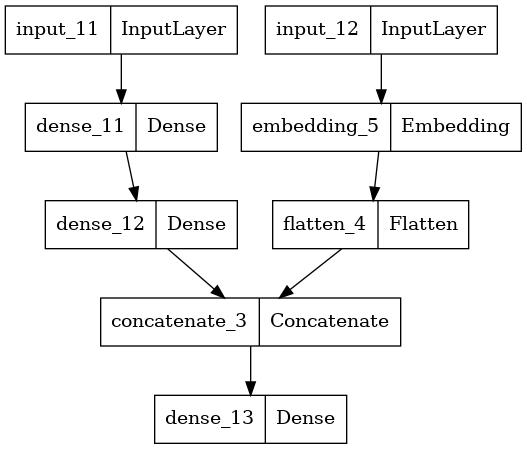

In [39]:
x_input=tf.keras.Input(shape=(10,))
customer_input=tf.keras.Input(shape=(1,))
x_dense1=tf.keras.layers.Dense(64,activation='relu')(x_input)
x_dense2=tf.keras.layers.Dense(64,activation='relu')(x_dense1)



#customers
customer_embedding=tf.keras.layers.Embedding(
input_dim=21018,
output_dim=64,
input_length=1)(customer_input)


customer_flatten=tf.keras.layers.Flatten()(customer_embedding)
concat=tf.keras.layers.concatenate([x_dense2,customer_flatten])
#output
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(concat)
model=tf.keras.Model(inputs=[x_input,customer_input],outputs=outputs)
print(model.summary())



tf.keras.utils.plot_model(model)

# Compiling the Model

In [47]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])

# Training the Model

In [48]:
history=model.fit([x_train,customer_xtrain],
                 y_train,validation_split=0.2,
                 batch_size=32,
                 epochs=10,
                 callbacks=[tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss',
                 patience=2,
                 restore_best_weights=True
                 )
                           ]
                 )

Epoch 1/10
111346/111346 [==============================] - 596s 5ms/step - loss: 0.0040 - accuracy: 0.9993 - auc: 0.8937 - val_loss: 0.0034 - val_accuracy: 0.9993 - val_auc: 0.9272
Epoch 2/10
111346/111346 [==============================] - 579s 5ms/step - loss: 0.0032 - accuracy: 0.9994 - auc: 0.9249 - val_loss: 0.0030 - val_accuracy: 0.9994 - val_auc: 0.9635
Epoch 3/10
111346/111346 [==============================] - 566s 5ms/step - loss: 0.0029 - accuracy: 0.9994 - auc: 0.9363 - val_loss: 0.0028 - val_accuracy: 0.9994 - val_auc: 0.9606
Epoch 4/10
111346/111346 [==============================] - 581s 5ms/step - loss: 0.0029 - accuracy: 0.9994 - auc: 0.9437 - val_loss: 0.0031 - val_accuracy: 0.9994 - val_auc: 0.9835
Epoch 5/10
111346/111346 [==============================] - 578s 5ms/step - loss: 0.0027 - accuracy: 0.9995 - auc: 0.9452 - val_loss: 0.0032 - val_accuracy: 0.9994 - val_auc: 0.9012


In [49]:
model.evaluate([x_test,customer_xtest],y_test)

59650/59650 [==============================] - 176s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - auc: 0.9631


[0.0027114993426948786, 0.9994378685951233, 0.9630947709083557]

In [52]:
y_true=np.array(y_test)
y_pred=np.squeeze(model.predict([x_test,customer_xtest]))
y_pred=(y_pred>=0.5).astype(np.int)

59650/59650 [==============================] - 101s 2ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
y_true

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
cm=confusion_matrix(y_true,y_pred)
cm

array([[1906261,      57],
       [   1016,    1452]])

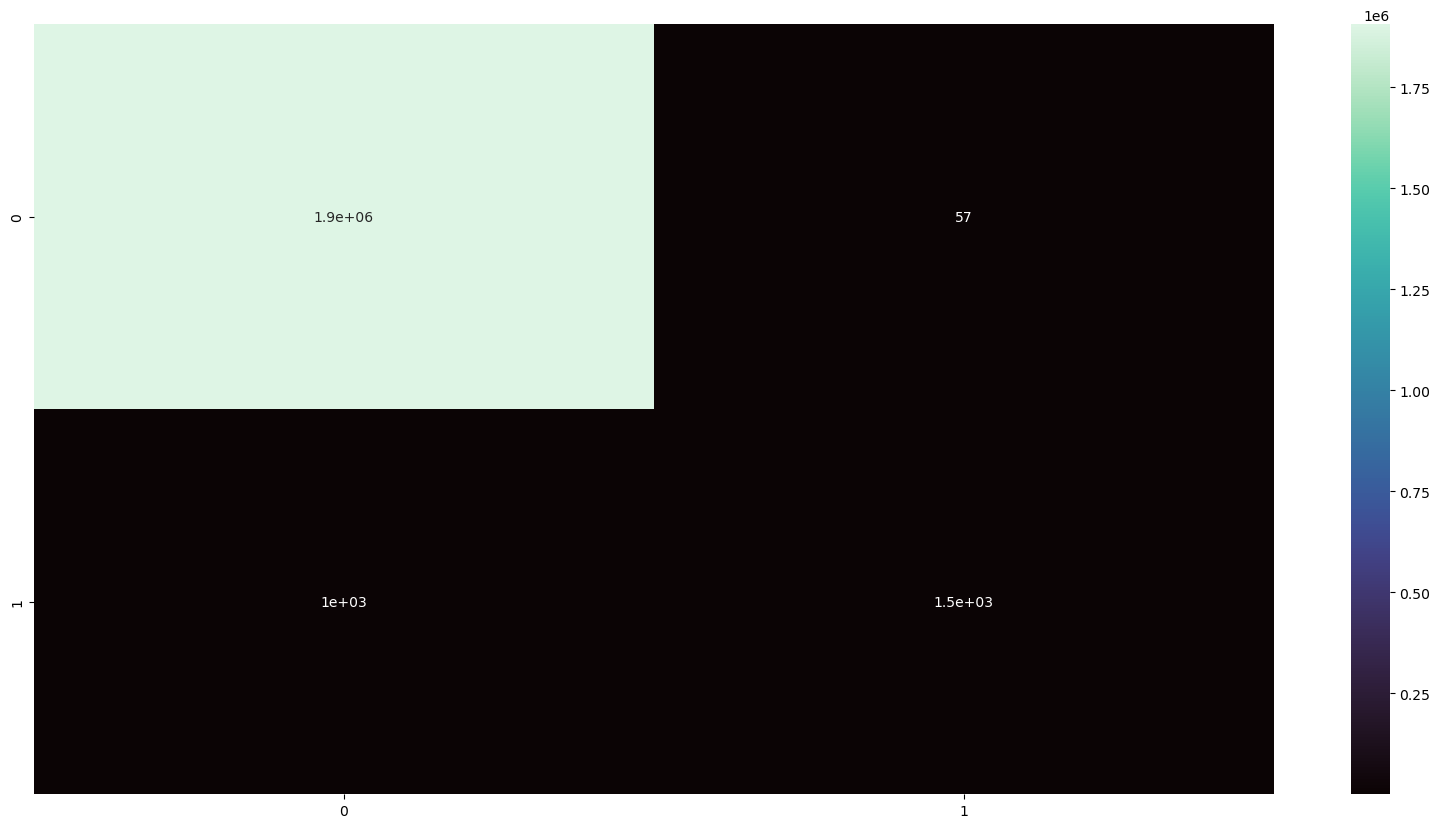

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

In [63]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.96      0.59      0.73      2468

    accuracy                           1.00   1908786
   macro avg       0.98      0.79      0.86   1908786
weighted avg       1.00      1.00      1.00   1908786



In [33]:
customer_embedding.shape

TensorShape([None, 1, 64])

In [35]:
customer_flatten.shape

TensorShape([None, 64])

# Checking or number of unique value in each column

In [ ]:
{column:len(df[column].unique()) for column in df.columns}

In [ ]:
{}